# Wildfire Learning
***
A springboard project based on [this Kaggle dataset of 1.88 million US wildfires](https://www.kaggle.com/rtatman/188-million-us-wildfires).

In [1]:
%matplotlib inline
import pandas as pd
import sqlite3
import sklearn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

This data publication contains a spatial database of wildfires that occurred in the United States from 1992 to 2015. It is the third update of a publication originally generated to support the national Fire Program Analysis (FPA) system. The wildfire records were acquired from the reporting systems of federal, state, and local fire organizations. The following core data elements were required for records to be included in this data publication: discovery date, final fire size, and a point location at least as precise as Public Land Survey System (PLSS) section (1-square mile grid). The data were transformed to conform, when possible, to the data standards of the National Wildfire Coordinating Group (NWCG). Basic error-checking was performed and redundant records were identified and removed, to the degree possible. The resulting product, referred to as the Fire Program Analysis fire-occurrence database (FPA FOD), includes 1.88 million geo-referenced wildfire records, representing a total of 140 million acres burned during the 24-year period.

In [2]:
con = sqlite3.connect("./FPA_FOD_20170508.sqlite")
df = pd.read_sql_query("SELECT * from fires", con)
con.close()

In [3]:
df_null = df.isnull()
df_null.sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

We see that the dataset contains a significant number of columns with null data. These columns are largely redundant though.

In [4]:
# Drop any and all columns that have missing values. Most of this data is unimportant anyway.
df.dropna(axis=1, inplace=True)
df.drop(['FOD_ID', 'FPA_ID', 'Shape'], axis=1, inplace=True)

In [5]:
df_null = df.isnull()
df_null.sum()

OBJECTID                      0
SOURCE_SYSTEM_TYPE            0
SOURCE_SYSTEM                 0
NWCG_REPORTING_AGENCY         0
NWCG_REPORTING_UNIT_ID        0
NWCG_REPORTING_UNIT_NAME      0
SOURCE_REPORTING_UNIT         0
SOURCE_REPORTING_UNIT_NAME    0
FIRE_YEAR                     0
DISCOVERY_DATE                0
DISCOVERY_DOY                 0
STAT_CAUSE_CODE               0
STAT_CAUSE_DESCR              0
FIRE_SIZE                     0
FIRE_SIZE_CLASS               0
LATITUDE                      0
LONGITUDE                     0
OWNER_CODE                    0
OWNER_DESCR                   0
STATE                         0
dtype: int64

In [6]:
df.set_index('OBJECTID')

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE
OBJECTID,,,,,,,,,,,,,,,,,,,
1,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,2005,2453403.5,33,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,5.0,USFS,CA
2,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,2004,2453137.5,133,1.0,Lightning,0.25,A,38.933056,-120.404444,5.0,USFS,CA
3,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,2004,2453156.5,152,5.0,Debris Burning,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA
4,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,2004,2453184.5,180,1.0,Lightning,0.10,A,38.559167,-119.913333,5.0,USFS,CA
5,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,2004,2453184.5,180,1.0,Lightning,0.10,A,38.559167,-119.933056,5.0,USFS,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880461,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,2015,2457291.5,269,13.0,Missing/Undefined,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA
1880462,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,2015,2457300.5,278,9.0,Miscellaneous,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA
1880463,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,2015,2457144.5,122,13.0,Missing/Undefined,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA


In [7]:
points = df[['LATITUDE', 'LONGITUDE']].values
min_lat = min(points[:,0])
min_lon = min(points[:,1])
points[:,0] = points[:,0] - min_lat
points[:,1] = points[:,1] - min_lon
max_lat = max(points[:,0])
max_lon = max(points[:,1])
points[:,0] = 10*points[:,0]/max_lat
points[:,1] = 10*points[:,1]/max_lon
points[:,0] = points[:,0].astype(int)
points[:,1] = points[:,1].astype(int)
points

array([[4., 5.],
       [4., 5.],
       [4., 5.],
       ...,
       [3., 5.],
       [3., 5.],
       [3., 5.]])

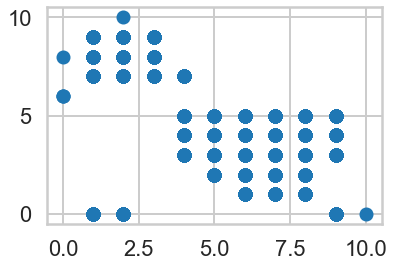

In [8]:
X = points[:,1]
Y = points[:,0]
plt.scatter(X,Y)
plt.show()

In [9]:
from hilbertcurve.hilbertcurve import HilbertCurve
p=4; n=2
hilbert = HilbertCurve(p, n)
df['HILBERT'] = hilbert.distances_from_points(points)

In [10]:
df['HILBERT']

0          33
1          33
2          33
3          52
4          52
           ..
1880460    32
1880461    52
1880462    52
1880463    52
1880464    52
Name: HILBERT, Length: 1880465, dtype: int64

## Data wrangling

We're trying to learn more about how wildfires are clustered. If the cause of a particular fire can be determined from the features of that fire, relevant agencies may be able to more accurately implement preventative and/or ameliorative measures.

In [11]:
plt.rcParams['figure.figsize'] = [40, 10]

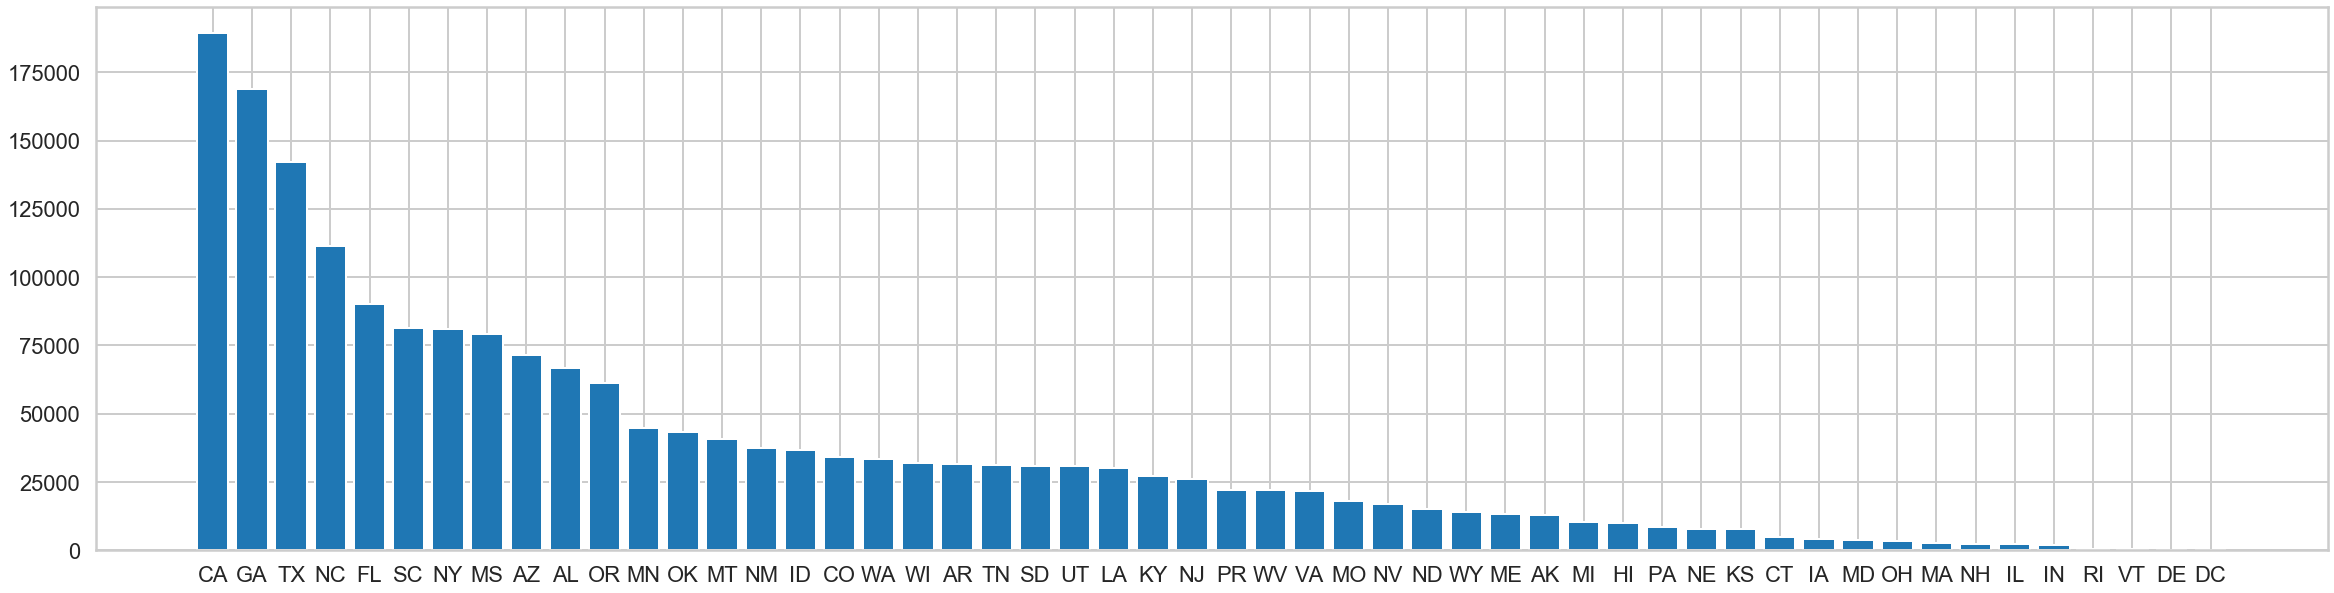

In [12]:
by_state = df.groupby('STATE')['OBJECTID'].count().sort_values(ascending=False)
X = by_state.index
Y = by_state.values
plt.bar(X, Y)
plt.show()

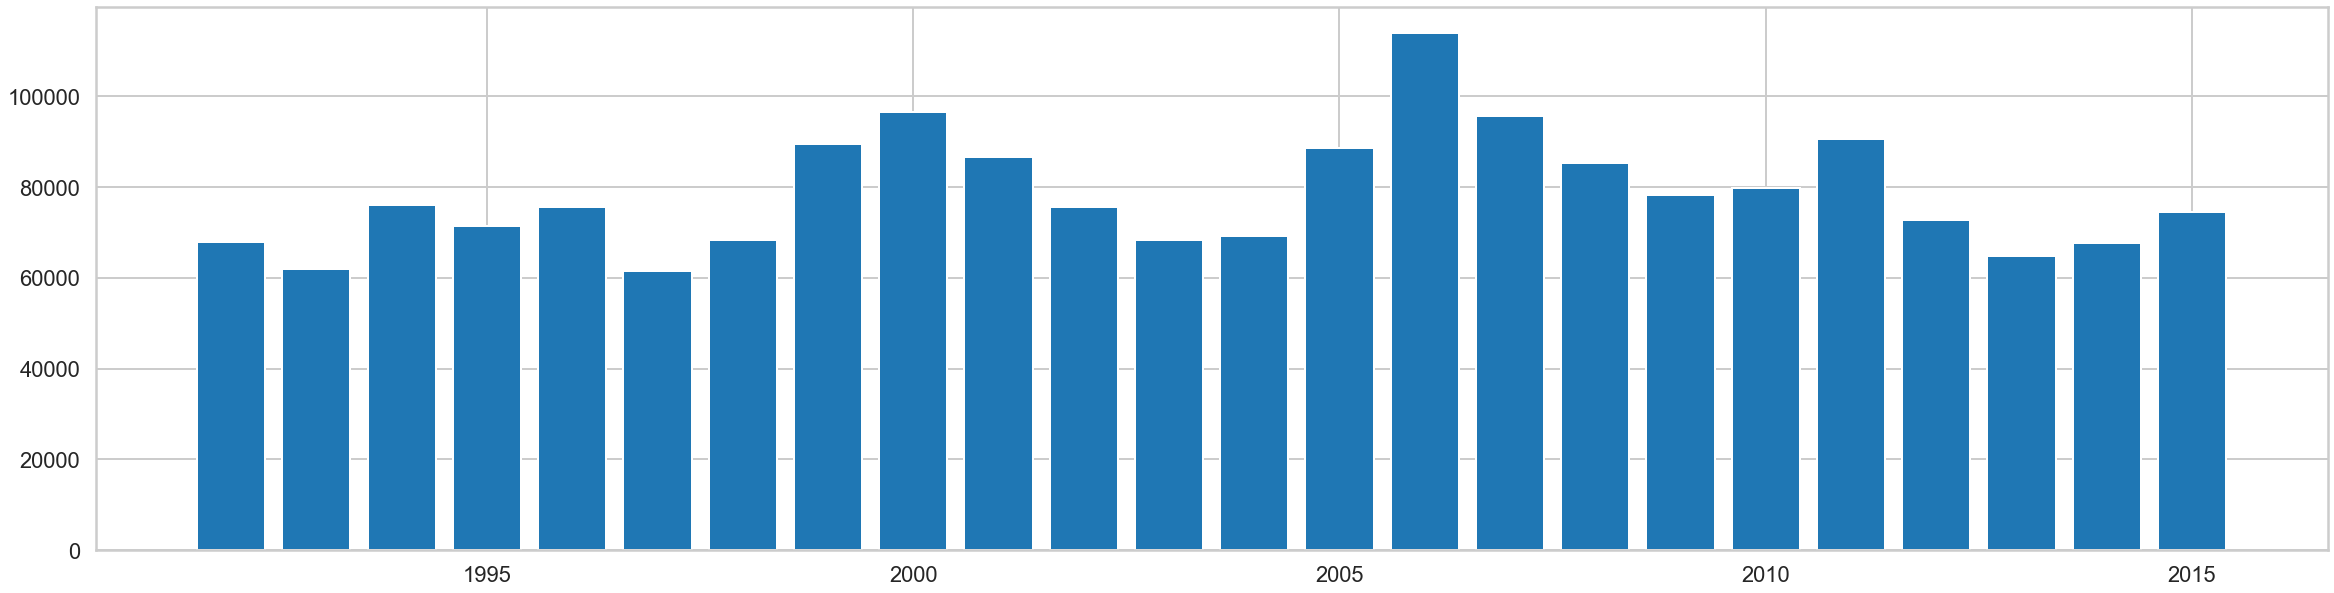

In [13]:
by_year = df.groupby('FIRE_YEAR')['OBJECTID'].count().sort_values()
X = by_year.index
Y = by_year.values
plt.bar(X, Y)
plt.show()

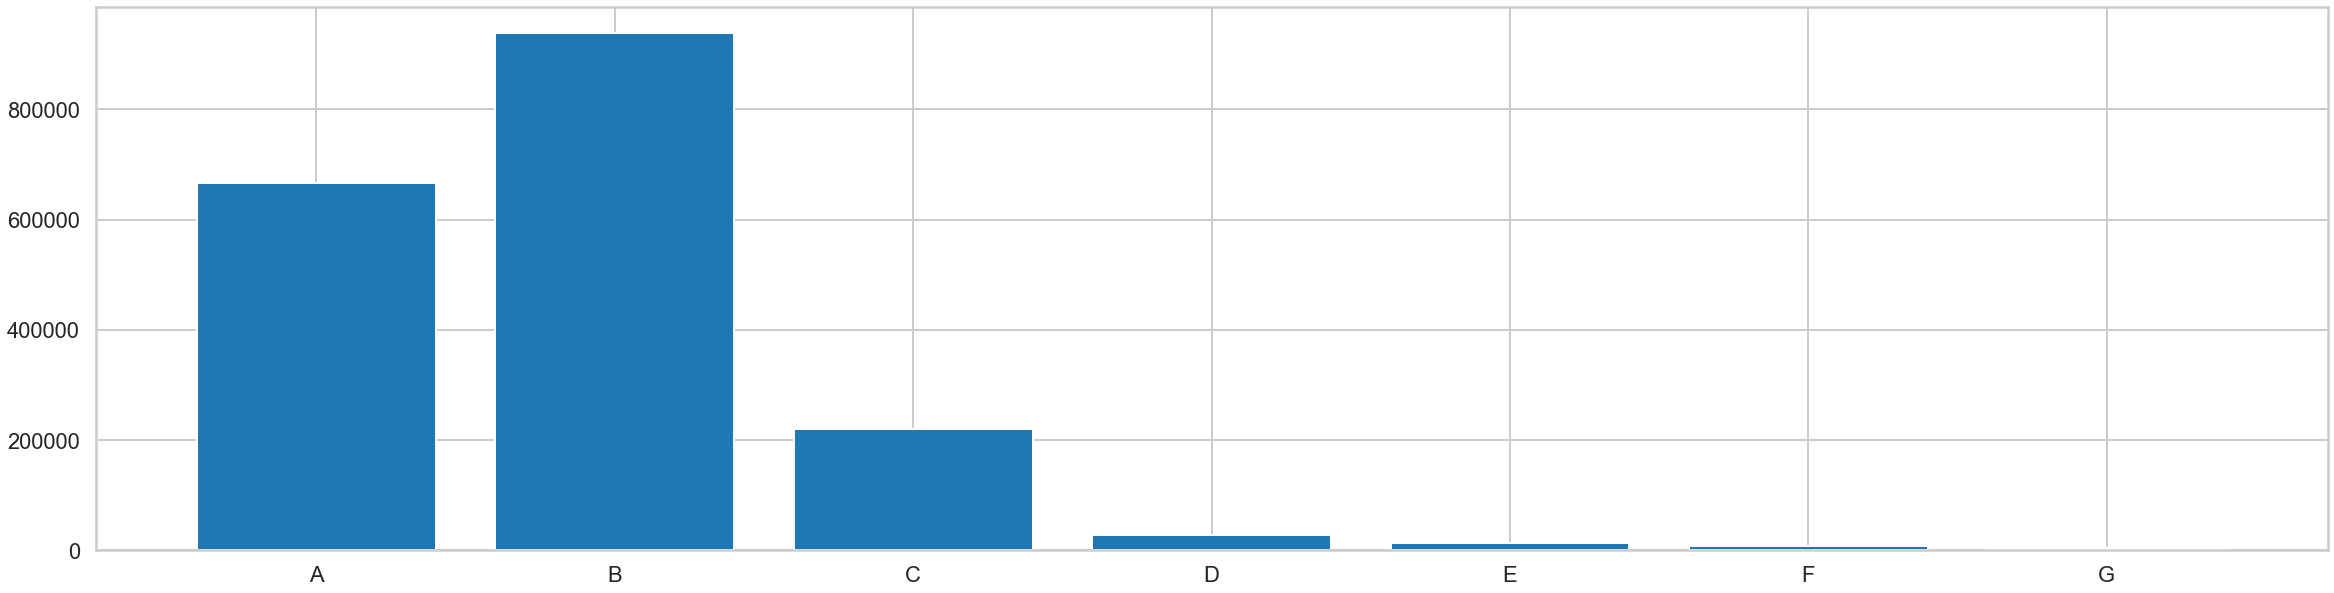

In [14]:
by_size = df.groupby('FIRE_SIZE_CLASS')['OBJECTID'].count()
X = by_size.index
Y = by_size.values
plt.bar(X, Y)
plt.show()

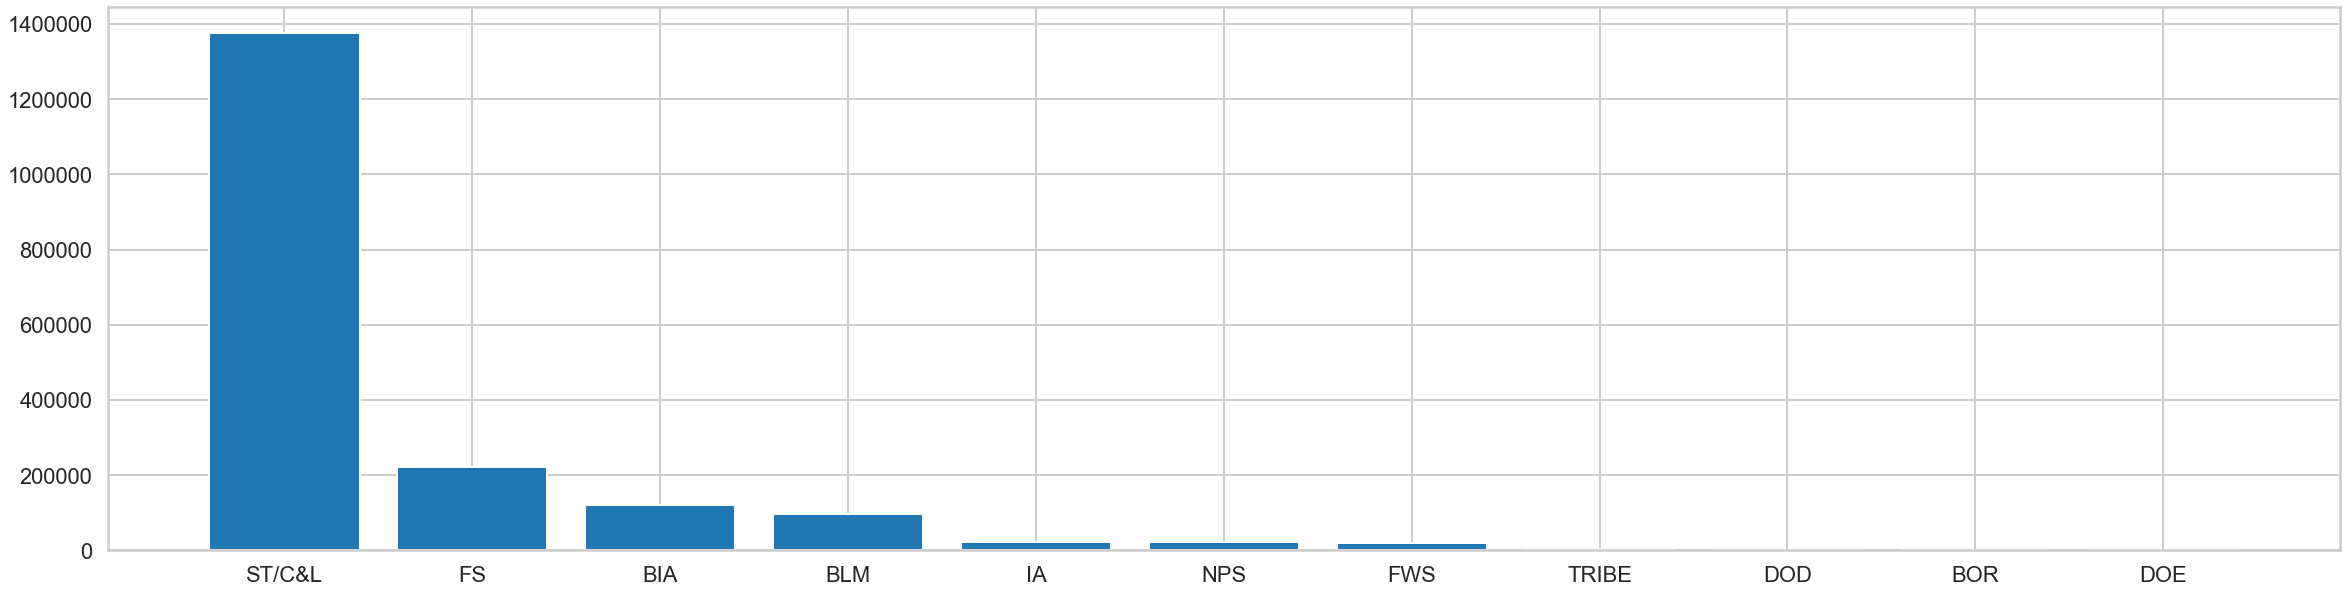

In [15]:
by_agency = df.groupby('NWCG_REPORTING_AGENCY')['OBJECTID'].count().sort_values(ascending=False)
X = by_agency.index
Y = by_agency.values
plt.bar(X, Y)
plt.show()

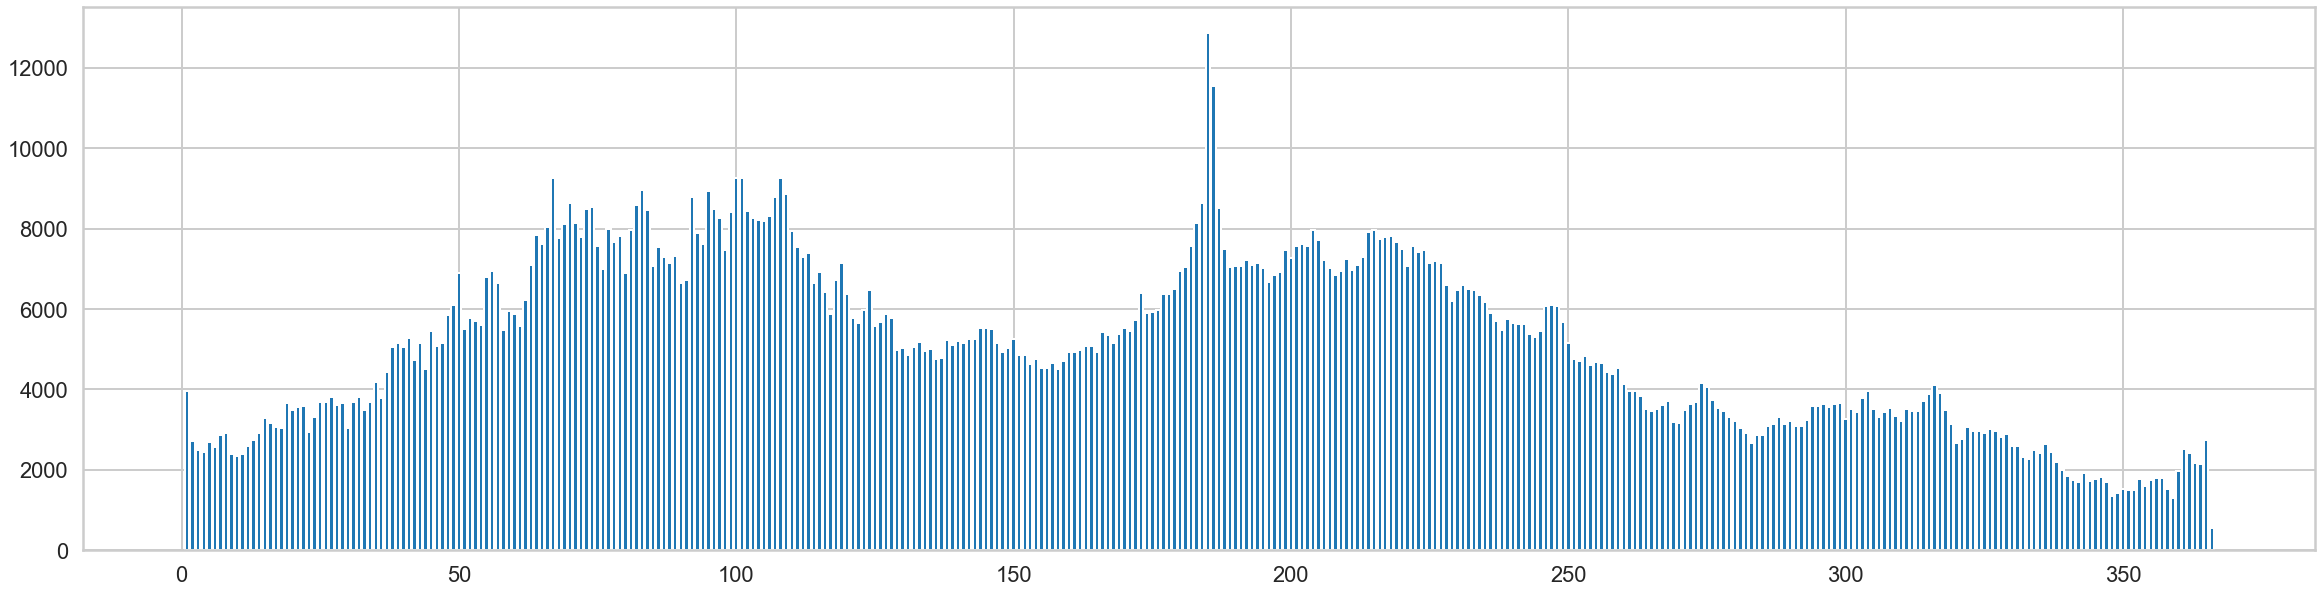

In [16]:
by_agency = df.groupby('DISCOVERY_DOY')['OBJECTID'].count().sort_values(ascending=False)
X = by_agency.index
Y = by_agency.values
plt.bar(X, Y)
plt.show()

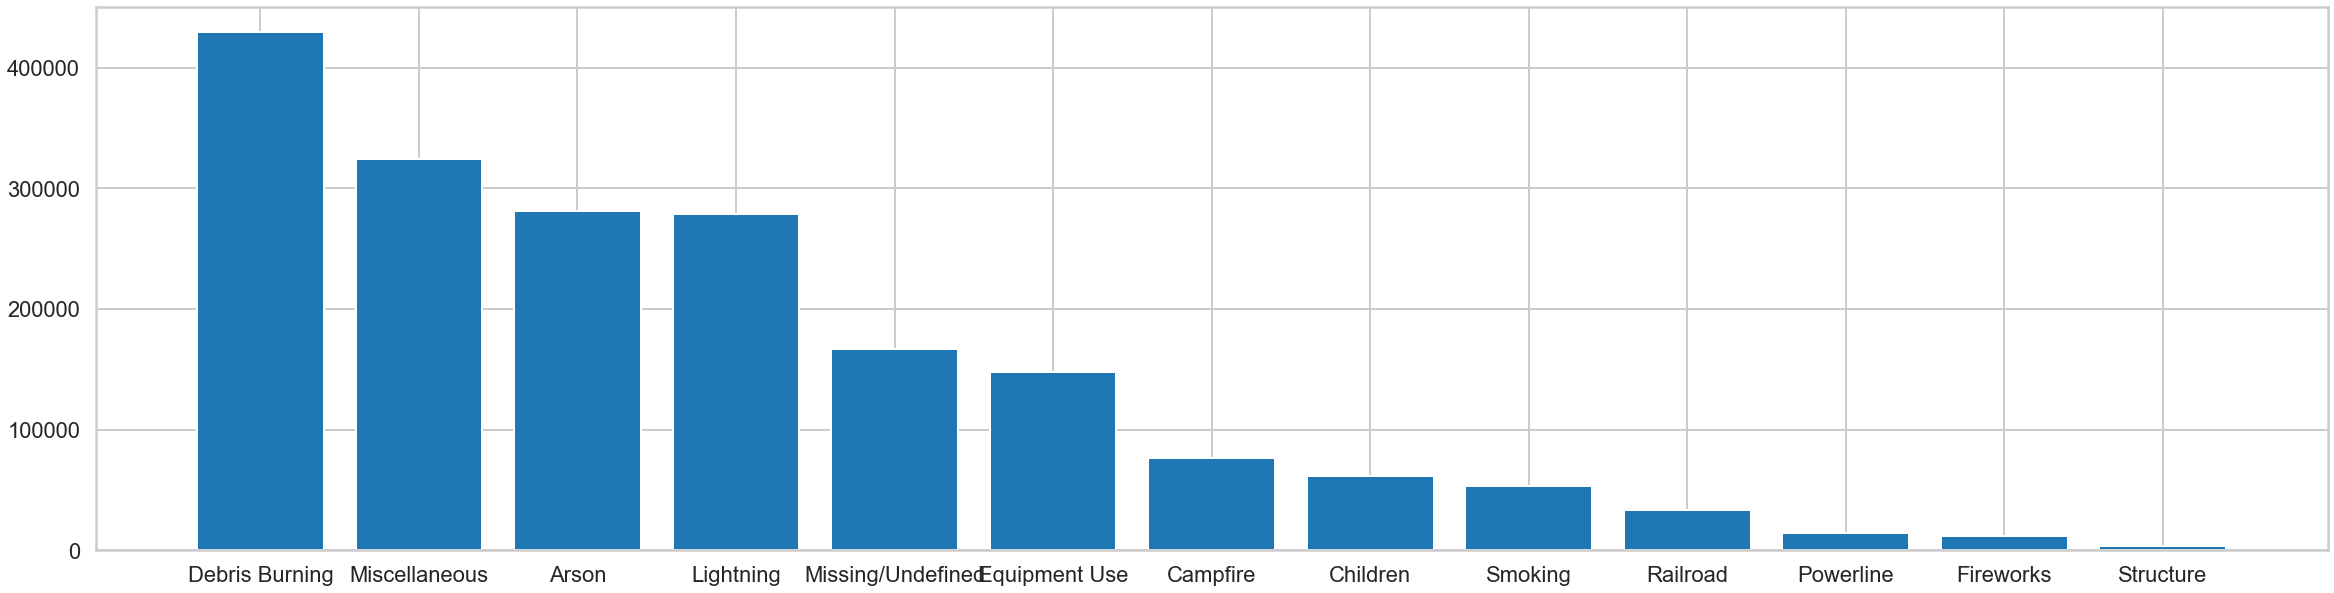

In [17]:
by_cause = df.groupby('STAT_CAUSE_DESCR')['OBJECTID'].count().sort_values(ascending=False)
X = by_cause.index
Y = by_cause.values
plt.bar(X, Y)
plt.show()

In [18]:
plt.rcParams['figure.figsize'] = [40, 30]

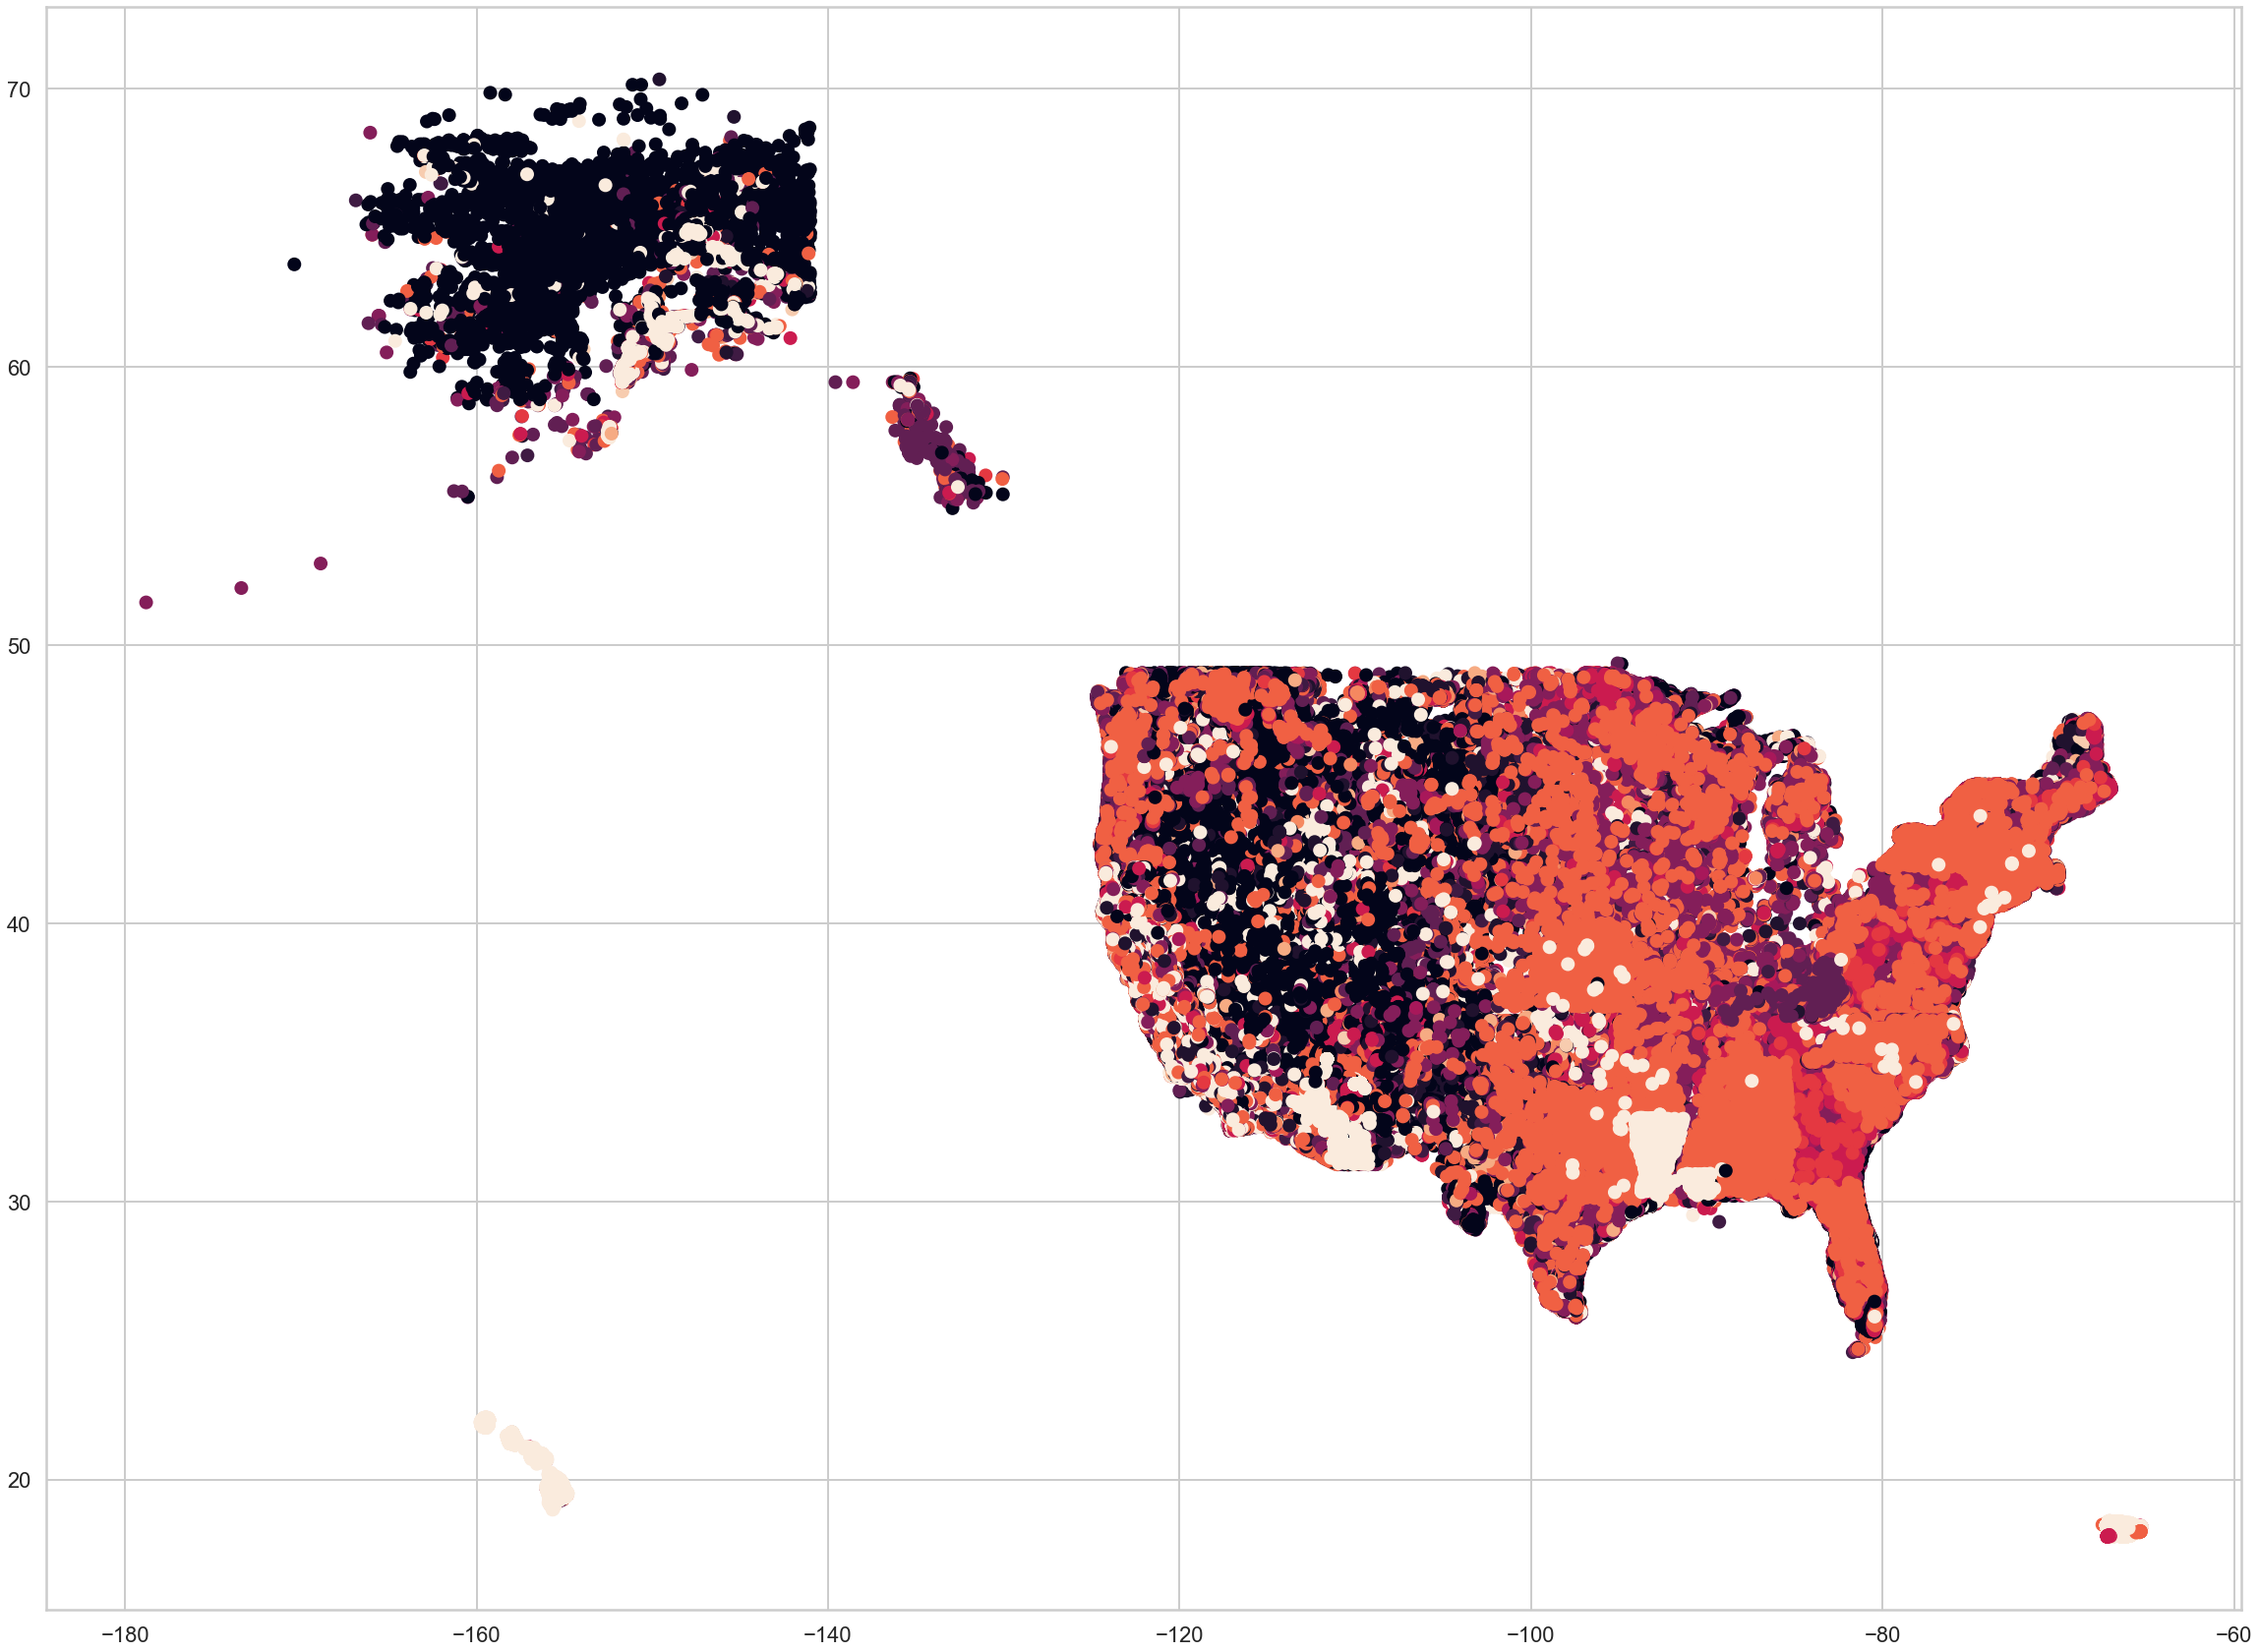

In [19]:
X = df['LONGITUDE']
Y = df['LATITUDE']
C = df['STAT_CAUSE_CODE']
plt.scatter(X, Y, c=C)
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 21 columns):
OBJECTID                      int64
SOURCE_SYSTEM_TYPE            object
SOURCE_SYSTEM                 object
NWCG_REPORTING_AGENCY         object
NWCG_REPORTING_UNIT_ID        object
NWCG_REPORTING_UNIT_NAME      object
SOURCE_REPORTING_UNIT         object
SOURCE_REPORTING_UNIT_NAME    object
FIRE_YEAR                     int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                 int64
STAT_CAUSE_CODE               float64
STAT_CAUSE_DESCR              object
FIRE_SIZE                     float64
FIRE_SIZE_CLASS               object
LATITUDE                      float64
LONGITUDE                     float64
OWNER_CODE                    float64
OWNER_DESCR                   object
STATE                         object
HILBERT                       int64
dtypes: float64(6), int64(4), object(11)
memory usage: 301.3+ MB


In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler()
df[['DISCOVERY_DOY']] = scaler.fit_transform(df[['DISCOVERY_DOY']])
df_features = pd.get_dummies(df[['DISCOVERY_DOY','FIRE_SIZE_CLASS','STATE']])
df_class = df.STAT_CAUSE_DESCR

In [22]:
df_class

0              Miscellaneous
1                  Lightning
2             Debris Burning
3                  Lightning
4                  Lightning
                 ...        
1880460    Missing/Undefined
1880461        Miscellaneous
1880462    Missing/Undefined
1880463    Missing/Undefined
1880464        Miscellaneous
Name: STAT_CAUSE_DESCR, Length: 1880465, dtype: object

In [53]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_features[0:100], df_class[0:100], random_state=41)

clf = LogisticRegression(multi_class='multinomial', solver='newton-cg')
# Fit the model on the training data.
clf.fit(Xlr, ylr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xlr), ylr))

0.6133333333333333


In [58]:
df[['DISCOVERY_DOY','FIRE_SIZE','HILBERT']] = scaler.fit_transform(df[['DISCOVERY_DOY','FIRE_SIZE','HILBERT']])
df_features = pd.get_dummies(df[['DISCOVERY_DOY','FIRE_SIZE_CLASS','STATE']])

In [59]:
df_features

,DISCOVERY_DOY,FIRE_SIZE_CLASS_A,FIRE_SIZE_CLASS_B,FIRE_SIZE_CLASS_C,FIRE_SIZE_CLASS_D,FIRE_SIZE_CLASS_E,FIRE_SIZE_CLASS_F,FIRE_SIZE_CLASS_G,STATE_AK,STATE_AL,...,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY
0,0.087671,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.361644,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.413699,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.490411,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.490411,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,0.734247,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1880461,0.758904,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1880462,0.331507,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1880463,0.783562,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_features, df_class, random_state=41)

clf = LogisticRegression(solver='liblinear')
# Fit the model on the training data.
clf.fit(Xlr, ylr)

/Users/rjhar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))
print(accuracy_score(clf.predict(Xlr), ylr))

0.411289104627146
0.4112389282645134


In [62]:
clf = LogisticRegression(multi_class='multinomial', solver='newton-cg')
# Fit the model on the training data.
clf.fit(Xlr, ylr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))
print(accuracy_score(clf.predict(Xlr), ylr))

0.41142524095065697
0.4113303950514341


In [44]:
clf.predict(df_features.loc[[5402]])

array(['Debris Burning'], dtype=object)

In [45]:
df_class.loc[[5402]]

5402    Lightning
Name: STAT_CAUSE_DESCR, dtype: object

In [39]:
ylr[0:100]

1059504       Debris Burning
1232467            Lightning
718645     Missing/Undefined
1538686        Miscellaneous
1392315             Children
                 ...        
463675     Missing/Undefined
402124         Equipment Use
1001932       Debris Burning
1845801        Miscellaneous
276560        Debris Burning
Name: STAT_CAUSE_DESCR, Length: 100, dtype: object